In [12]:
import pandas as pd
stack_overflow = pd.read_feather('stack_overflow.feather')
print(stack_overflow.head())

   respondent                                        main_branch hobbyist   
0        36.0  I am not primarily a developer, but I write co...      Yes  \
1        47.0                     I am a developer by profession      Yes   
2        69.0                     I am a developer by profession      Yes   
3       125.0  I am not primarily a developer, but I write co...      Yes   
4       147.0  I am not primarily a developer, but I write co...       No   

    age  age_1st_code age_first_code_cut comp_freq  comp_total   
0  34.0          30.0              adult    Yearly     60000.0  \
1  53.0          10.0              child    Yearly     58000.0   
2  25.0          12.0              child    Yearly    550000.0   
3  41.0          30.0              adult   Monthly    200000.0   
4  28.0          15.0              adult    Yearly     50000.0   

   converted_comp         country  ...          survey_length trans   
0         77556.0  United Kingdom  ...  Appropriate in length    No  

In [3]:
# Hypothesizing about the mean
mean_comp_samp = stack_overflow['converted_comp'].mean()

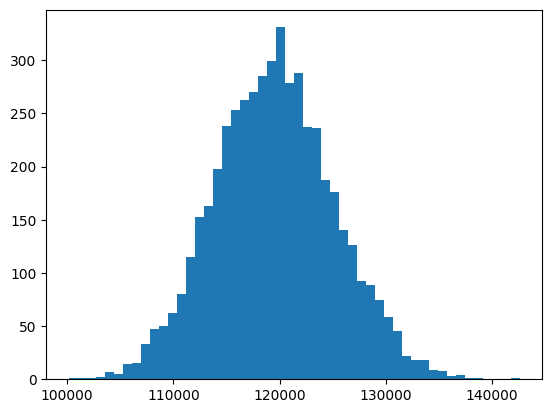

5625.345856334281


In [4]:
# Generating a bootstrap distribution
import numpy as np
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
        np.mean(stack_overflow.sample(frac=1, replace=True)['converted_comp'])
    )

import matplotlib.pyplot as plt
plt.hist(so_boot_distn, bins=50)
plt.show()

std_error = np.std(so_boot_distn, ddof=1)
print(std_error)

In [5]:
stack_overflow['converted_comp'].mean()

mean_comp_hyp = 110000
std_error

z_score = (mean_comp_samp - mean_comp_hyp) / std_error
print(z_score)

1.702067326386368


In [6]:
# Calculating the z-score
prop_child_samp = (stack_overflow['age_first_code_cut'] == 'child').mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)

NameError: name 'first_code_boot_distn' is not defined

In [8]:
from scipy.stats import norm
1 - norm.cdf(z_score, loc=0, scale=1)

0.04437137401547531

In [9]:
# Calculating the p-value
alpha = 0.05
prop_child_samp = (stack_overflow['age_first_code_cut'] == 'child').mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)

z_score = (prop_child_samp - prop_child_hyp) / std_error

p_value = 1 - norm.cdf(z_score, loc=0, scale=1)


NameError: name 'first_code_boot_distn' is not defined

In [10]:
# Confidence intervals
import numpy as np
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print((lower, upper))

NameError: name 'first_code_boot_distn' is not defined

In [11]:
# Calculating groupwsie summary statistics
stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [12]:
# Calculations assuming the null hypothesis is true
xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
print(xbar)

s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
print(s)

n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
print(n)

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64
age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64
age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64


In [13]:
# Calculating the test statistic
import numpy as np
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator

degrees_of_freedom = n_child + n_adult - 2

from scipy.stats import t
1 - t.cdf(t_stat, df=degrees_of_freedom)

NameError: name 'xbar_child' is not defined

In [1]:
import pandas as pd
repub_votes_potus_08_12 = pd.read_feather('repub_votes.feather')
print(repub_votes_potus_08_12.head())

        state   county  repub_percent_08  repub_percent_12
0     Alabama     Hale         38.957877         37.139882
1    Arkansas   Nevada         56.726272         58.983452
2  California     Lake         38.896719         39.331367
3  California  Ventura         42.923190         45.250693
4    Colorado  Lincoln         74.522569         73.764757


-2.877109041242944


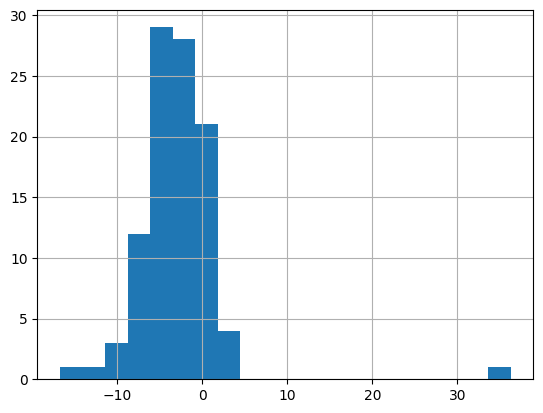

In [15]:
sample_data = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']

import matplotlib.pyplot as plt
sample_data['diff'].hist(bins=20)

# Calculate sample statistics of the difference
xbar_diff = sample_data['diff'].mean()
print(xbar_diff)

In [16]:
# Calculating the p-value
import numpy as np  
n_diff = len(sample_data)
print(n_diff)

s_diff = sample_data['diff'].std()
print(s_diff)

t_stat = (xbar_diff - 0) / np.sqrt(s_diff**2/n_diff)
print(t_stat)

degrees_of_freedom = n_diff - 1
print(degrees_of_freedom)

from scipy.stats import t
p_value = t.cdf(t_stat, df=n_diff-1)
print(p_value)

100
5.136737887231852
-5.601043121928489
99
9.572537285272411e-08


In [17]:
# Testind differences between two means using ttest()
import pingouin
pingouin.ttest(x=sample_data['diff'], y=0, alternative='less')


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,0.999955


In [18]:
# ttest() with paired=True
pingouin.ttest(x=sample_data['repub_percent_08'], y=sample_data['repub_percent_12'], paired=True, alternative='less')

# Unpaired ttest()
pingouin.ttest(x=sample_data['repub_percent_08'], y=sample_data['repub_percent_12'], paired=False, alternative='less') # False - the default


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


In [19]:
# ANOVA tests
stack_overflow['job_sat'].value_counts()

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

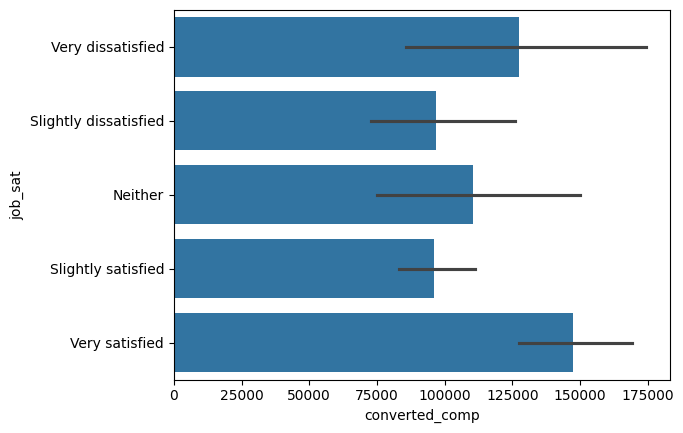

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='converted_comp', y='job_sat', data=stack_overflow)
plt.show()

In [21]:
# Analysis of variance (ANOVA)
alpha = 0.2
pingouin.anova(data=stack_overflow, dv='converted_comp', between='job_sat')

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


In [22]:
# pairwise_tests()
pingouin.pairwise_tests(data=stack_overflow, dv='converted_comp', between='job_sat', padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


In [27]:
alpha = 0.01
stack_overflow['age_cat'].value_counts(normalize=True)

# Variables for z
p_hat = (stack_overflow['age_cat'] == 'Under 30').mean()
print(p_hat)

p_0 = 0.50
n = len(stack_overflow)
print(n)

0.5356037151702786
2261


In [29]:
# Calculating the z-score
import numpy as np
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1-p_0)/n)
z_score = numerator / denominator
print(z_score)

3.385911440783663


In [33]:
# Calculating the p-value
from scipy.stats import norm
p_value = norm.cdf(z_score)
print(p_value) # Left-tailed("less than")
p_value = 1 - norm.cdf(z_score)
print(p_value) # Right-tailed("greater than") 
p_value = norm.cdf(z_score) + 1 - norm.cdf(z_score)
print(p_value)  # Two-tailed("not equal")

0.999645288631595
0.00035471136840503625
1.0


In [38]:
# Getting the numbers for the z-score
p_hats = stack_overflow.groupby('age_cat')['hobbyist'].value_counts(normalize=True)
print(p_hats)
n = stack_overflow.groupby('age_cat')['hobbyist'].count()
print(n)

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: proportion, dtype: float64
age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64


In [40]:
p_hats = stack_overflow.groupby('age_cat')['hobbyist'].value_counts(normalize=True)
print(p_hats)

p_hat_at_least_30 = p_hats[('At least 30', 'Yes')]
p_hat_under_30 = p_hats[('Under 30', 'Yes')]
print(p_hat_at_least_30, p_hat_under_30)

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: proportion, dtype: float64
0.7733333333333333 0.8431048720066061


In [41]:
n =  stack_overflow.groupby('age_cat')['hobbyist'].count()
print(n)

n_at_least_30 = n['At least 30']
n_under_30 = n['Under 30']
print(n_at_least_30, n_under_30)

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64
1050 1211


In [42]:
p_hat = (n_at_least_30 * p_hat_at_least_30 + n_under_30 * p_hat_under_30) / (n_at_least_30 + n_under_30)
print(p_hat)

std_error = np.sqrt(p_hat * (1-p_hat) / n_at_least_30 + p_hat * (1-p_hat) / n_under_30)
print(std_error)

z_score = (p_hat_at_least_30 - p_hat_under_30) / std_error
print(z_score)

0.810703228659885
0.016519089824430542
-4.223691463320559


In [49]:
stack_overflow.groupby('age_cat')['hobbyist'].value_counts()

n_hobbyist = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190])
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hobbyist, nobs=n_rows, alternative='two-sided')
print(z_score, p_value)

-4.223691463320559 2.403330142685068e-05


In [51]:
# test for independence of variables
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbyist', y='age_cat', correction=False)
print(stats)

                 test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  17.839570  1.0  0.000024  0.088826  0.988205
1        cressie-read  0.666667  17.818114  1.0  0.000024  0.088773  0.988126
2      log-likelihood  0.000000  17.802653  1.0  0.000025  0.088734  0.988069
3       freeman-tukey -0.500000  17.815060  1.0  0.000024  0.088765  0.988115
4  mod-log-likelihood -1.000000  17.848099  1.0  0.000024  0.088848  0.988236
5              neyman -2.000000  17.976656  1.0  0.000022  0.089167  0.988694


<Axes: xlabel='job_sat'>

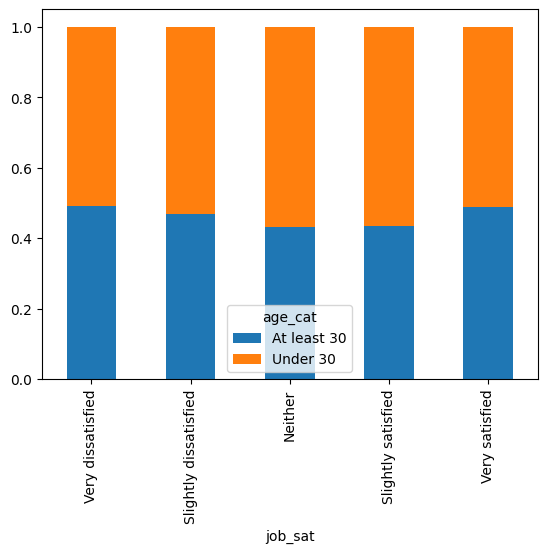

In [53]:
# Exploratory visualization: proportional stacked bar plot
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar', stacked=True)

<Axes: xlabel='age_cat'>

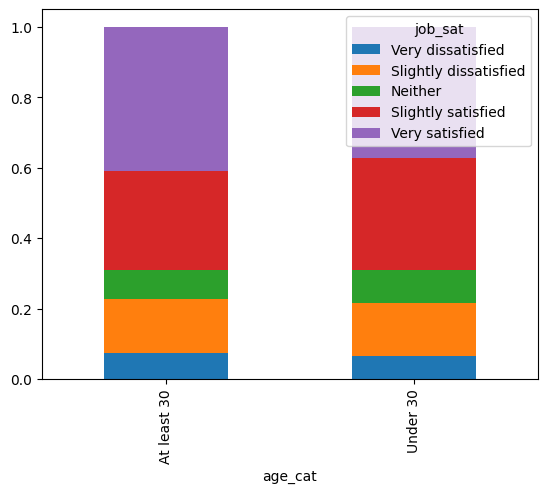

In [54]:
# Swapping the variables
props = stack_overflow.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar', stacked=True)

In [55]:
#chi-square both ways
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='age_cat', y='job_sat')
print(stats[stats['test'] == 'pearson'])

      test  lambda      chi2  dof      pval    cramer     power
0  pearson     1.0  5.552373  4.0  0.235164  0.049555  0.437417


In [57]:
# Purple links
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts = purple_link_counts.rename_axis('purple_link').reset_index(name='n').sort_values('purple_link')
print(purple_link_counts)

         purple_link     n
2             Amused   368
3            Annoyed   263
0  Hello, old friend  1225
1        Indifferent   405


In [58]:
# Declaring the hypotheses
hypothesized = pd.DataFrame({
    'purple_link': ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
    'prop': [1/6, 1/6, 1/2, 1/6]
})
print(hypothesized)

         purple_link      prop
0             Amused  0.166667
1            Annoyed  0.166667
2  Hello, old friend  0.500000
3        Indifferent  0.166667


In [60]:
# Hypothesized counts by category
n_total = len(stack_overflow)
hypothesized['n'] = hypothesized['prop'] * n_total
print(hypothesized)

         purple_link      prop            n
0             Amused  0.166667   376.833333
1            Annoyed  0.166667   376.833333
2  Hello, old friend  0.500000  1130.500000
3        Indifferent  0.166667   376.833333


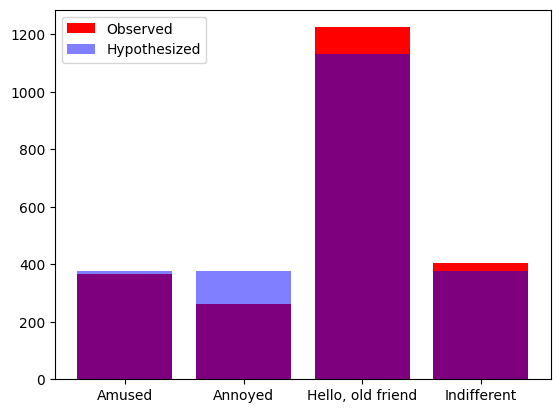

In [61]:
# Visualizing counts
import matplotlib.pyplot as plt
plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color='red', label='Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.5, color='blue', label='Hypothesized')
plt.legend()
plt.show()

In [62]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesized['n'])


Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

In [2]:
# Results with pingouin.ttest()
alpha = 0.01
import pingouin
pingouin.ttest(x=repub_votes_potus_08_12['repub_percent_08'], y=repub_votes_potus_08_12['repub_percent_12'], paired=True, alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


In [3]:
# Non-paramteric tests
x = [1, 15, 3, 10, 6]
from scipy.stats import rankdata
rankdata(x)

array([1., 5., 2., 4., 3.])

In [5]:
# Wilcoxon-signed rank test
repub_votes_potus_08_12['diff'] = repub_votes_potus_08_12['repub_percent_08'] - repub_votes_potus_08_12['repub_percent_12']
print(repub_votes_potus_08_12)
repub_votes_potus_08_12['abs_diff'] = repub_votes_potus_08_12['diff'].abs()
print(repub_votes_potus_08_12)

         state       county  repub_percent_08  repub_percent_12       diff
0      Alabama         Hale         38.957877         37.139882   1.817995
1     Arkansas       Nevada         56.726272         58.983452  -2.257179
2   California         Lake         38.896719         39.331367  -0.434648
3   California      Ventura         42.923190         45.250693  -2.327503
4     Colorado      Lincoln         74.522569         73.764757   0.757812
..         ...          ...               ...               ...        ...
95   Wisconsin      Burnett         48.342541         52.437478  -4.094937
96   Wisconsin    La Crosse         37.490904         40.577038  -3.086134
97   Wisconsin    Lafayette         38.104967         41.675050  -3.570083
98     Wyoming       Weston         76.684241         83.983328  -7.299087
99      Alaska  District 34         77.063259         40.789626  36.273633

[100 rows x 5 columns]
         state       county  repub_percent_08  repub_percent_12       diff  

In [6]:
# Ranking the diff col
from scipy.stats import rankdata
repub_votes_potus_08_12['rank_abs_diff'] = rankdata(repub_votes_potus_08_12['abs_diff'])
print(repub_votes_potus_08_12)

         state       county  repub_percent_08  repub_percent_12       diff   
0      Alabama         Hale         38.957877         37.139882   1.817995  \
1     Arkansas       Nevada         56.726272         58.983452  -2.257179   
2   California         Lake         38.896719         39.331367  -0.434648   
3   California      Ventura         42.923190         45.250693  -2.327503   
4     Colorado      Lincoln         74.522569         73.764757   0.757812   
..         ...          ...               ...               ...        ...   
95   Wisconsin      Burnett         48.342541         52.437478  -4.094937   
96   Wisconsin    La Crosse         37.490904         40.577038  -3.086134   
97   Wisconsin    Lafayette         38.104967         41.675050  -3.570083   
98     Wyoming       Weston         76.684241         83.983328  -7.299087   
99      Alaska  District 34         77.063259         40.789626  36.273633   

     abs_diff  rank_abs_diff  
0    1.817995           33.0  
1

In [8]:
import numpy as np
T_minus = 1 + 4 + 5 + 2 + 3
T_plus = 0
W = np.min([T_minus, T_plus])
print(W)

0


In [11]:
# Implementation with pingouin.wilcoxon()
alpha = 0.01
pingouin.wilcoxon(x=repub_votes_potus_08_12['repub_percent_08'], y=repub_votes_potus_08_12['repub_percent_12'], alternative='less')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,386.0,less,9.700674e-14,-0.847129,0.5729


In [15]:
# Wilcoxon-Mann-Whitney test setup
age_vs_comp = stack_overflow[['converted_comp', 'age_first_code_cut']]
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', values='converted_comp')
print(age_vs_comp_wide)

age_first_code_cut      adult     child
0                     77556.0       NaN
1                         NaN   74970.0
2                         NaN  594539.0
3                   2000000.0       NaN
4                     37816.0       NaN
...                       ...       ...
2256                      NaN  145000.0
2257                      NaN   33972.0
2258                      NaN   97284.0
2259                      NaN   72000.0
2260                      NaN  180000.0

[2261 rows x 2 columns]


In [17]:
alpha = 0.01
import pingouin
pingouin.mwu(x=age_vs_comp_wide['child'], y=age_vs_comp_wide['adult'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,-0.222516,0.611258


In [19]:
#Krushal-Wallis test
alpha = 0.01
pingouin.kruskal(data=stack_overflow, dv='converted_comp', between='job_sat')

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15
